<a href="https://colab.research.google.com/github/anshulnangru/Wine-Quality-Prediction/blob/main/Wine_Quality_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
wine_dataset=pd.read_csv('/content/drive/MyDrive/ML projects datasets/winequality-red.csv')

In [3]:
wine_dataset.shape

(1599, 12)

In [4]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data Analysis and visualization

In [6]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


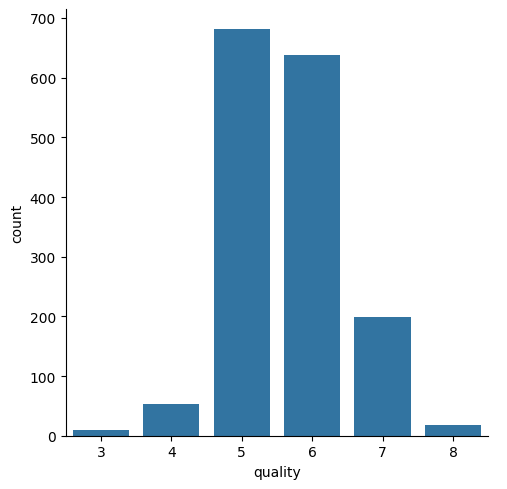

In [7]:
sns.catplot(x='quality',data=wine_dataset,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

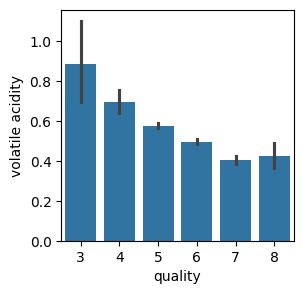

In [13]:
#volatile acidity vs quality
plot=plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

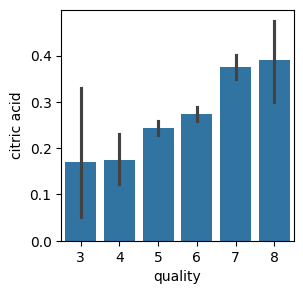

In [15]:
#citric acide vs quality
plot=plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)

correlation

1. Positive Correlation

2. Negative Correlation

In [19]:
correlation=wine_dataset.corr()

<Axes: >

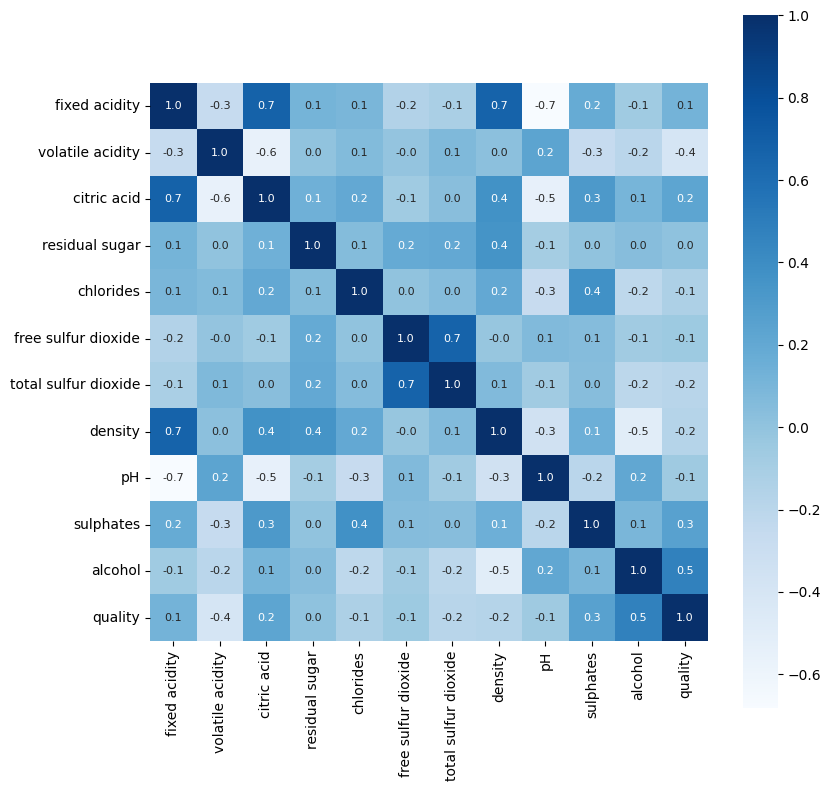

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Data Preprocessing

In [25]:
X=wine_dataset.drop('quality',axis=1)
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Target/Label Binarization

In [31]:
Y=wine_dataset['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [32]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train Test Split

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=5)


In [34]:
print(X.shape,X_train.shape,X_test.shape,Y.shape,Y_train.shape,Y_test.shape)

(1599, 11) (1439, 11) (160, 11) (1599,) (1439,) (160,)


Training

In [36]:
model=RandomForestClassifier()

In [37]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [39]:
#accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print(test_data_accuracy)

0.91875


In [49]:
input_data=(7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

input_data_df = pd.DataFrame([input_data], columns=X.columns)

prediction=model.predict(input_data_df)
print(prediction)

if(prediction[0]==0):
  print("bad quality wine")
else:
  print("good quality wine")

[1]
good quality wine
